In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('bmw.csv')

In [2]:
df.shape 

(10781, 9)

In [3]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
pd.isnull(df)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10776,False,False,False,False,False,False,False,False,False
10777,False,False,False,False,False,False,False,False,False
10778,False,False,False,False,False,False,False,False,False
10779,False,False,False,False,False,False,False,False,False


In [6]:
# check full null Values
pd.isnull(df).sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
               year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000  


In [9]:
# Data Cleaning 
df = df.drop_duplicates()

# Handle missing values
df = df.ffill()   # forward fill (new recommended syntax)

print("\ncleaned Dataset Info:")
print(df.info())


cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10664 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10664 non-null  object 
 1   year          10664 non-null  int64  
 2   price         10664 non-null  int64  
 3   transmission  10664 non-null  object 
 4   mileage       10664 non-null  int64  
 5   fuelType      10664 non-null  object 
 6   tax           10664 non-null  int64  
 7   mpg           10664 non-null  float64
 8   engineSize    10664 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 833.1+ KB
None


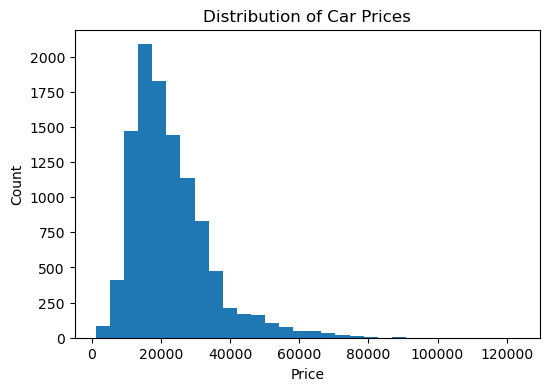

In [10]:
if 'price' in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df['price'], bins=30)
    plt.title("Distribution of Car Prices")
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

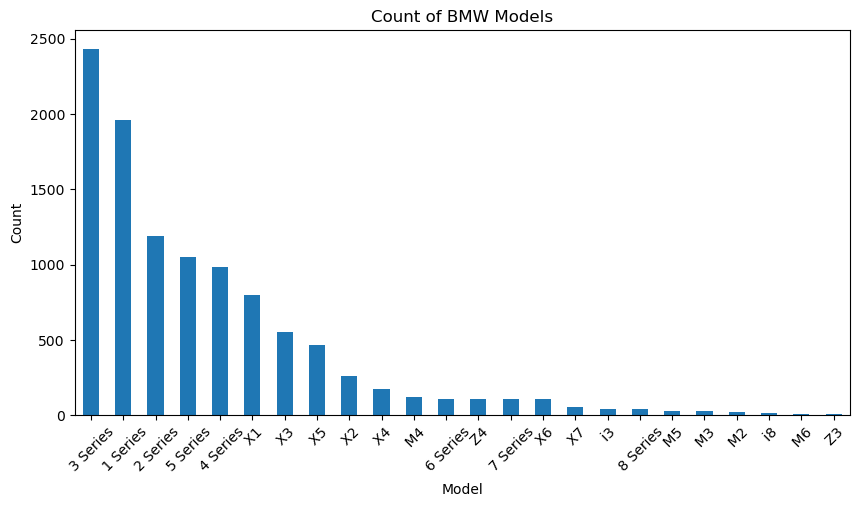

In [11]:
if 'model' in df.columns:
    plt.figure(figsize=(10,5))
    df['model'].value_counts().plot(kind='bar')
    plt.title("Count of BMW Models")
    plt.xlabel("Model")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


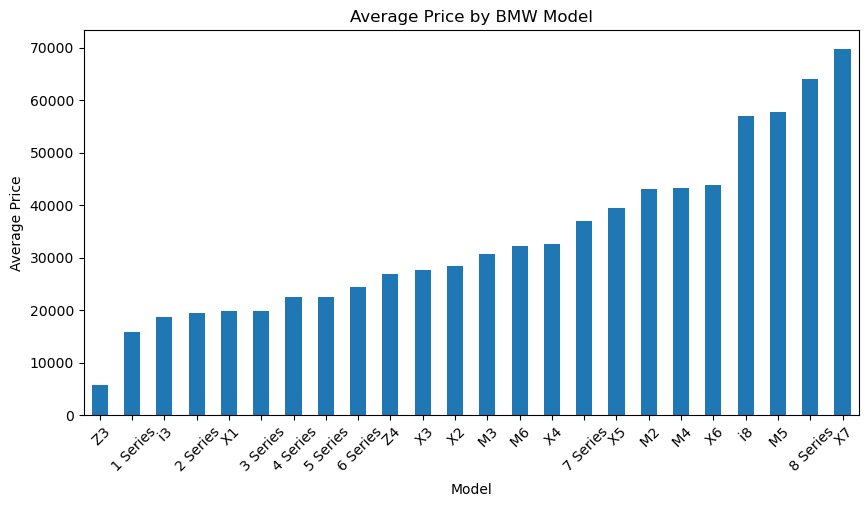

In [12]:
if 'price' in df.columns and 'model' in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby('model')['price'].mean().sort_values().plot(kind='bar')
    plt.title("Average Price by BMW Model")
    plt.xlabel("Model")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45)
    plt.show()


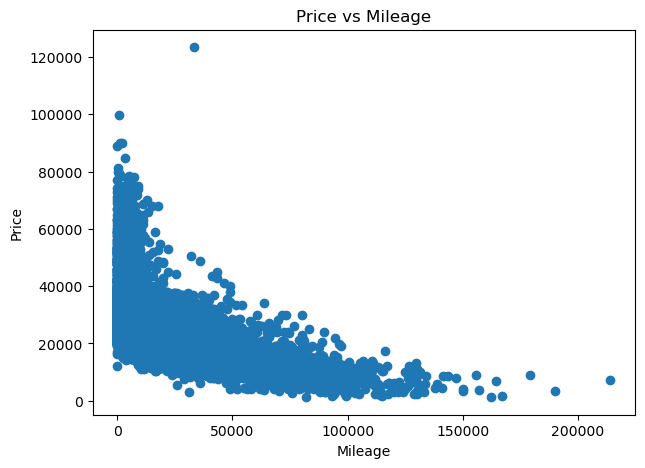

In [13]:
if 'mileage' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(df['mileage'], df['price'])
    plt.title("Price vs Mileage")
    plt.xlabel("Mileage")
    plt.ylabel("Price")
    plt.show()


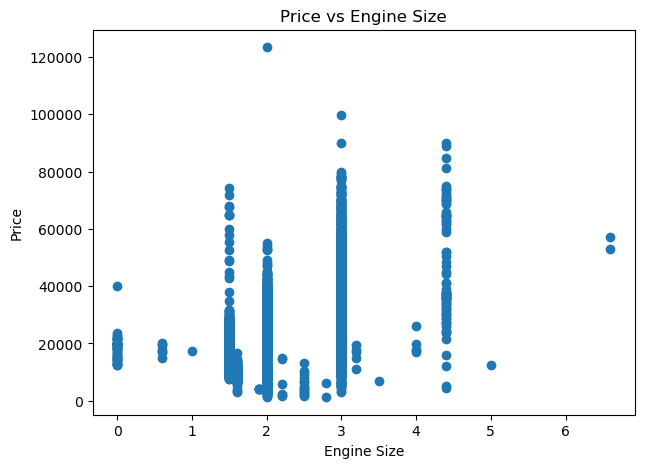

In [14]:
if 'engineSize' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(df['engineSize'], df['price'])
    plt.title("Price vs Engine Size")
    plt.xlabel("Engine Size")
    plt.ylabel("Price")
    plt.show()


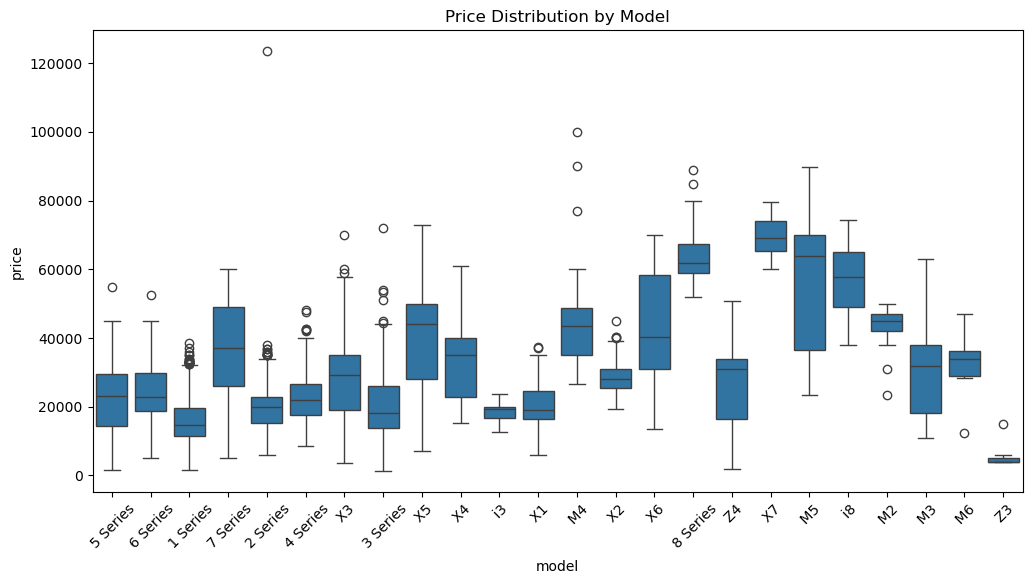

In [15]:
import seaborn as sns

if 'price' in df.columns and 'model' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='model', y='price', data=df)
    plt.title("Price Distribution by Model")
    plt.xticks(rotation=45)
    plt.show()


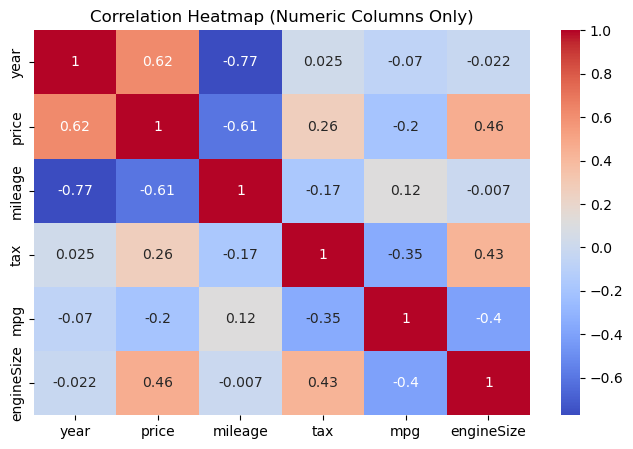

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()



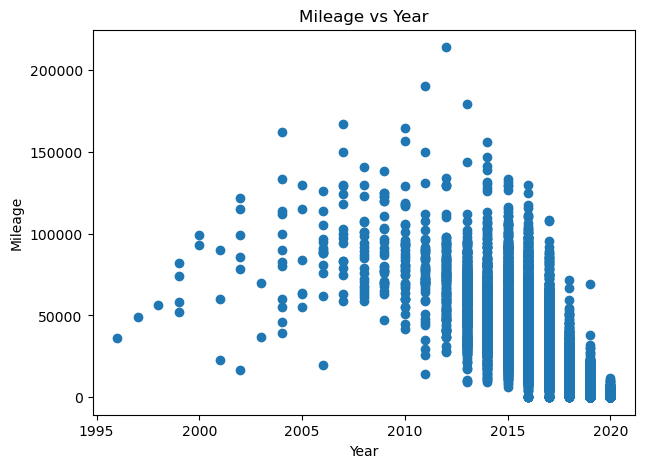

In [17]:
if 'year' in df.columns and 'mileage' in df.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(df['year'], df['mileage'])
    plt.title("Mileage vs Year")
    plt.xlabel("Year")
    plt.ylabel("Mileage")
    plt.show()


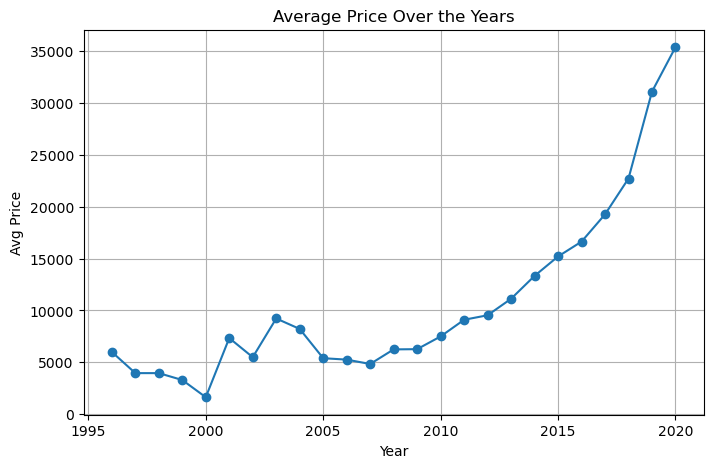

In [18]:
if 'year' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,5))
    df.groupby('year')['price'].mean().plot(kind='line', marker='o')
    plt.title("Average Price Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Avg Price")
    plt.grid()
    plt.show()


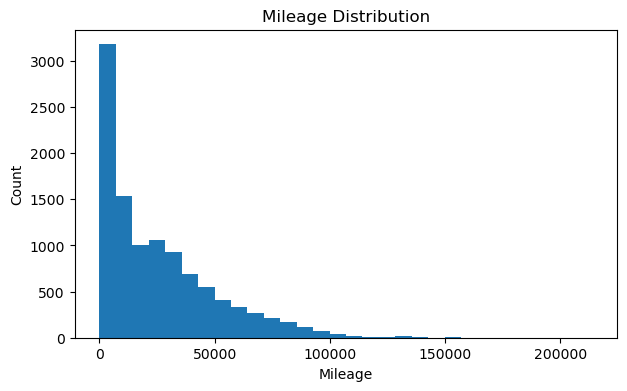

In [19]:
if 'mileage' in df.columns:
    plt.figure(figsize=(7,4))
    plt.hist(df['mileage'], bins=30)
    plt.title("Mileage Distribution")
    plt.xlabel("Mileage")
    plt.ylabel("Count")
    plt.show()


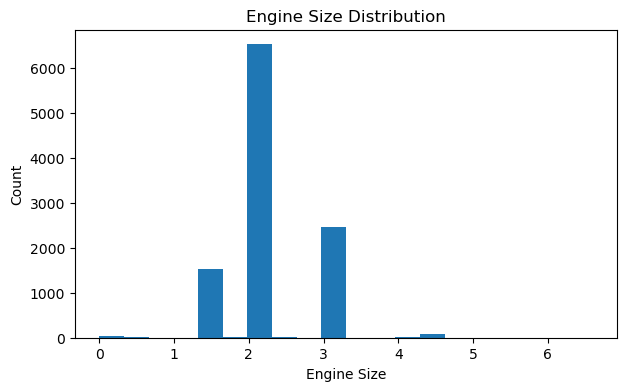

In [20]:
if 'engineSize' in df.columns:
    plt.figure(figsize=(7,4))
    plt.hist(df['engineSize'], bins=20)
    plt.title("Engine Size Distribution")
    plt.xlabel("Engine Size")
    plt.ylabel("Count")
    plt.show()

In [21]:
# Key insights Summary
def insight(text):
    print("-", text)

print("\n*KEY INSIGHTS:")
insight("Newer cars tend to have higher prices (positive correlation).")
insight("Higher mileage cars usually have lower market value.")
insight("Strong correlation found between car year, mileage, and price.")
insight("Price distribution is skewed depending on luxury model variants.")


*KEY INSIGHTS:
- Newer cars tend to have higher prices (positive correlation).
- Higher mileage cars usually have lower market value.
- Strong correlation found between car year, mileage, and price.
- Price distribution is skewed depending on luxury model variants.


In [22]:
df.to_csv("cleaned_bmw_dataset.csv", index=False)
print("\nCleaned dataset saved as: cleaned_bmw_dataset.csv")


Cleaned dataset saved as: cleaned_bmw_dataset.csv
